# Central Limit Theorem 

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-o0grtk2w
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-o0grtk2w
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 5.0 MB/s 
     |████████████████████████████████| 72 kB 502 kB/s 
  Created wheel for probml-utils: filename=probml_utils-0.1.dev48+gb130363-py3-none-any.whl size=32273 sha256=3b32c5e14abe51ad5447fe274ffcd27e0c8fcb0260505869f1aba17269294785
  Stored in directory: /tmp/pip-ephem-wheel-cache-0qx5il5e/wheels/37/8f/cb/b845cd5de3d7f648717815f9c27bec49975bf58637a97fa6be
  Created wheel for TexSoup: filename=TexSoup-0.3.1-py3-none-any.whl size=27666 sha256=a99a575737be5823b128d857fe91b9bffa87dcd09341340482c1a385ea7f1867
  Stored in directory: /root/.cache/pip/wheels/2b/8e/c6/7ee3f9f9776fd18c0ccb04492902ed42225b6dfab3c68f14c0
Successfully bu

In [2]:
latexify(width_scale_factor=2, fig_height=2)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
key = jax.random.PRNGKey(1)

In [4]:
def convolutionHist(N, sampleSize, bins):
    # Generating 1, 5 random numbers from 1 to 5
    # taking their mean and appending it to list means.
    means = []
    for j in N:
        # Generating seed so that we can get same result
        # every time the loop is run...
        x = jnp.mean(jax.random.beta(key, 1, 5, [sampleSize, j]), axis=1)
        means.append(x)

    return means

In [18]:
def plot_convolutionHist(means, N, sampleSize, bins):
    for i, mean_ in zip(N, means):
        counts, nbinslocation = jnp.histogram(mean_, bins=20)

        counts = counts / (sampleSize / bins)

        plt.figure()
        plt.title(f"N = {i}")
        plt.bar(nbinslocation[:-1], counts, width=0.02, color="black", align="edge")

        plt.xticks(jnp.linspace(0, 1, 3))
        plt.yticks(jnp.linspace(0, 3, 4))
        plt.xlim(0, 1)
        plt.ylim(0, 3)
        plt.xlabel("$x$")
        plt.ylabel("$mean$")
        sns.despine()
        savefig(f"clt_N_{i}_latexified")

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


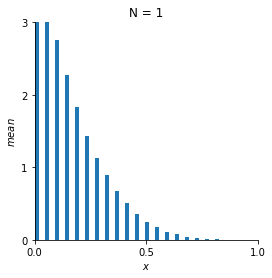

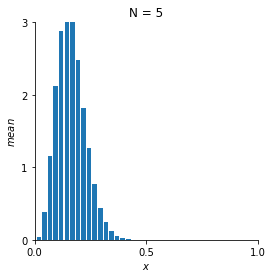

In [19]:
samples = 100000
bins = 20
N = [1, 5]
means = convolutionHist(N, samples, bins)
plot_convolutionHist(means, N, samples, bins)

In [20]:
from ipywidgets import interact


@interact(N_value=(1, 10))
def generate_random(N_value):
    samples = 100000
    bins = 20
    means = convolutionHist([N_value], samples, bins)
    plot_convolutionHist(means, [N_value], samples, bins)

interactive(children=(IntSlider(value=5, description='N_value', max=10, min=1), Output()), _dom_classes=('widg…